# Introduction


We are working with an abstract dataset to explore various regression techniques. Our approach includes implementing **linear regression**, **polynomial regression**, and **support vector regression**, followed by designing a compact **neural network**. Finally, we will evaluate and compare the performance of these models on both the training and validation sets to gain deeper insights into their effectiveness.

In [1]:
import pandas as pd
import numpy as np 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # To avoid some unnecessary errors that have no effect on our code execution.

df = pd.read_csv('/kaggle/input/math482-2024-2025-1-hw-03/train.csv')

df.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,target
0,1,43.71,-90.85,u,-28.35,0.20,0.24,B1,NaN,14.65,...,2.98,ij,5.29,C3,8.0,A2,ab,D4,654.69,357.98
1,2,95.56,-9.20,NaN,-14.07,0.91,0.04,B3,106.68,2.41,...,0.86,ij,-12.72,C1,6.0,A4,ac,D1,2.83,1103.49
2,3,75.88,NaN,u,-8.50,0.50,0.13,B3,70.79,3.10,...,7.83,ii,-3.47,C2,1.0,A5,ab,D1,312.83,501.38
3,4,63.88,NaN,q,NaN,3.07,0.36,B6,90.18,1.07,...,0.73,ji,31.65,C1,3.0,A8,ad,D1,1.99,1174.88
4,5,24.04,-41.22,t,-32.25,4.86,0.42,B5,119.19,8.07,...,1.12,jj,-12.25,NaN,5.0,A7,NaN,NaN,0.85,1350.99


At first glance, the dataset contains some missing values. Additionally, it consists of both numerical and categorical variables, requiring tailored preprocessing for effective analysis.

# Exploratory Data Analysis

We start EDA by exploring the dataset's structure, size, and data types, followed by examining summary statistics for numerical and categorical variables. Next, we handle missing values to ensure data completeness. We visualize data distributions and relationships using histograms, scatter plots, and heatmaps. Outliers are detected and addressed using statistical methods like IQR or Z-scores. Categorical variables are encoded to make them suitable for analysis. Redundant features are identified through correlation analysis, and highly correlated ones are removed. We then apply transformations like scaling and normalization to numerical features. In feature engineering, we create or modify features to enhance the dataset. Irrelevant features are identified using domain knowledge and feature selection methods and removed. Finally, we analyze the target variable and split the dataset into training, validation, and test sets for unbiased evaluation.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Summary Statistics

In [3]:
df.describe()

,id,feature_01,feature_02,feature_04,feature_05,feature_06,feature_08,feature_09,feature_10,feature_12,feature_13,feature_15,feature_17,feature_21,target
count,30000.000000,27152.000000,27136.000000,27110.000000,27130.000000,27158.000000,27120.000000,27125.000000,27093.000000,27116.000000,27146.000000,27177.000000,27153.000000,27096.000000,30000.000000
mean,15000.500000,394.091653,-1.118441,3.284273,18.375411,2.975368,900.604718,82.083026,567.926475,75.028336,14.034818,-2.416126,38.296082,33.437348,1128.936175
std,8660.398374,1164.757698,1457.028587,1164.123603,73.035304,9.566512,2531.803098,326.130917,1760.750944,288.609245,62.663453,621.802190,114.580951,113.363653,672.620668
min,1.000000,10.000000,-20547.790000,-12784.480000,0.000000,0.000000,24.350000,0.000000,10.000000,0.000000,0.030000,-3551.910000,0.000000,0.010000,-1591.420000
25%,7500.750000,35.010000,-37.900000,-38.160000,0.650000,0.170000,88.267500,3.230000,35.010000,3.210000,0.560000,-28.020000,4.000000,2.060000,693.887500
50%,15000.500000,59.430000,-0.020000,0.320000,1.600000,0.290000,102.890000,7.970000,59.610000,8.060000,1.150000,-0.160000,5.000000,3.740000,1112.195000
75%,22500.250000,84.380000,37.970000,38.587500,3.530000,0.440000,118.730000,17.590000,84.640000,17.590000,2.580000,27.670000,7.000000,6.410000,1552.382500
max,30000.000000,6428.390000,18226.740000,12244.390000,1241.330000,84.100000,15753.930000,5875.710000,9886.390000,5442.930000,2199.680000,3553.920000,926.870000,1565.080000,4400.180000


In [4]:
print(df.dtypes)



id              int64
feature_01    float64
feature_02    float64
feature_03     object
feature_04    float64
feature_05    float64
feature_06    float64
feature_07     object
feature_08    float64
feature_09    float64
feature_10    float64
feature_11     object
feature_12    float64
feature_13    float64
feature_14     object
feature_15    float64
feature_16     object
feature_17    float64
feature_18     object
feature_19     object
feature_20     object
feature_21    float64
target        float64
dtype: object


There are both categorical and numerical features. Now, we will create separate lists for categorical and numerical variables because these two types of data require different preprocessing steps. Categorical variables need encoding (e.g. one-hot or label encoding) to be used in machine learning models, while numerical variables often require scaling or normalization. By separating them, we can streamline the data preprocessing workflow and apply the appropriate transformations to each type efficiently.

In [3]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['feature_03', 'feature_07', 'feature_11', 'feature_14', 'feature_16', 'feature_18', 'feature_19', 'feature_20']
Numerical Features: ['id', 'feature_01', 'feature_02', 'feature_04', 'feature_05', 'feature_06', 'feature_08', 'feature_09', 'feature_10', 'feature_12', 'feature_13', 'feature_15', 'feature_17', 'feature_21', 'target']


Look at the distributions in the numerical features.

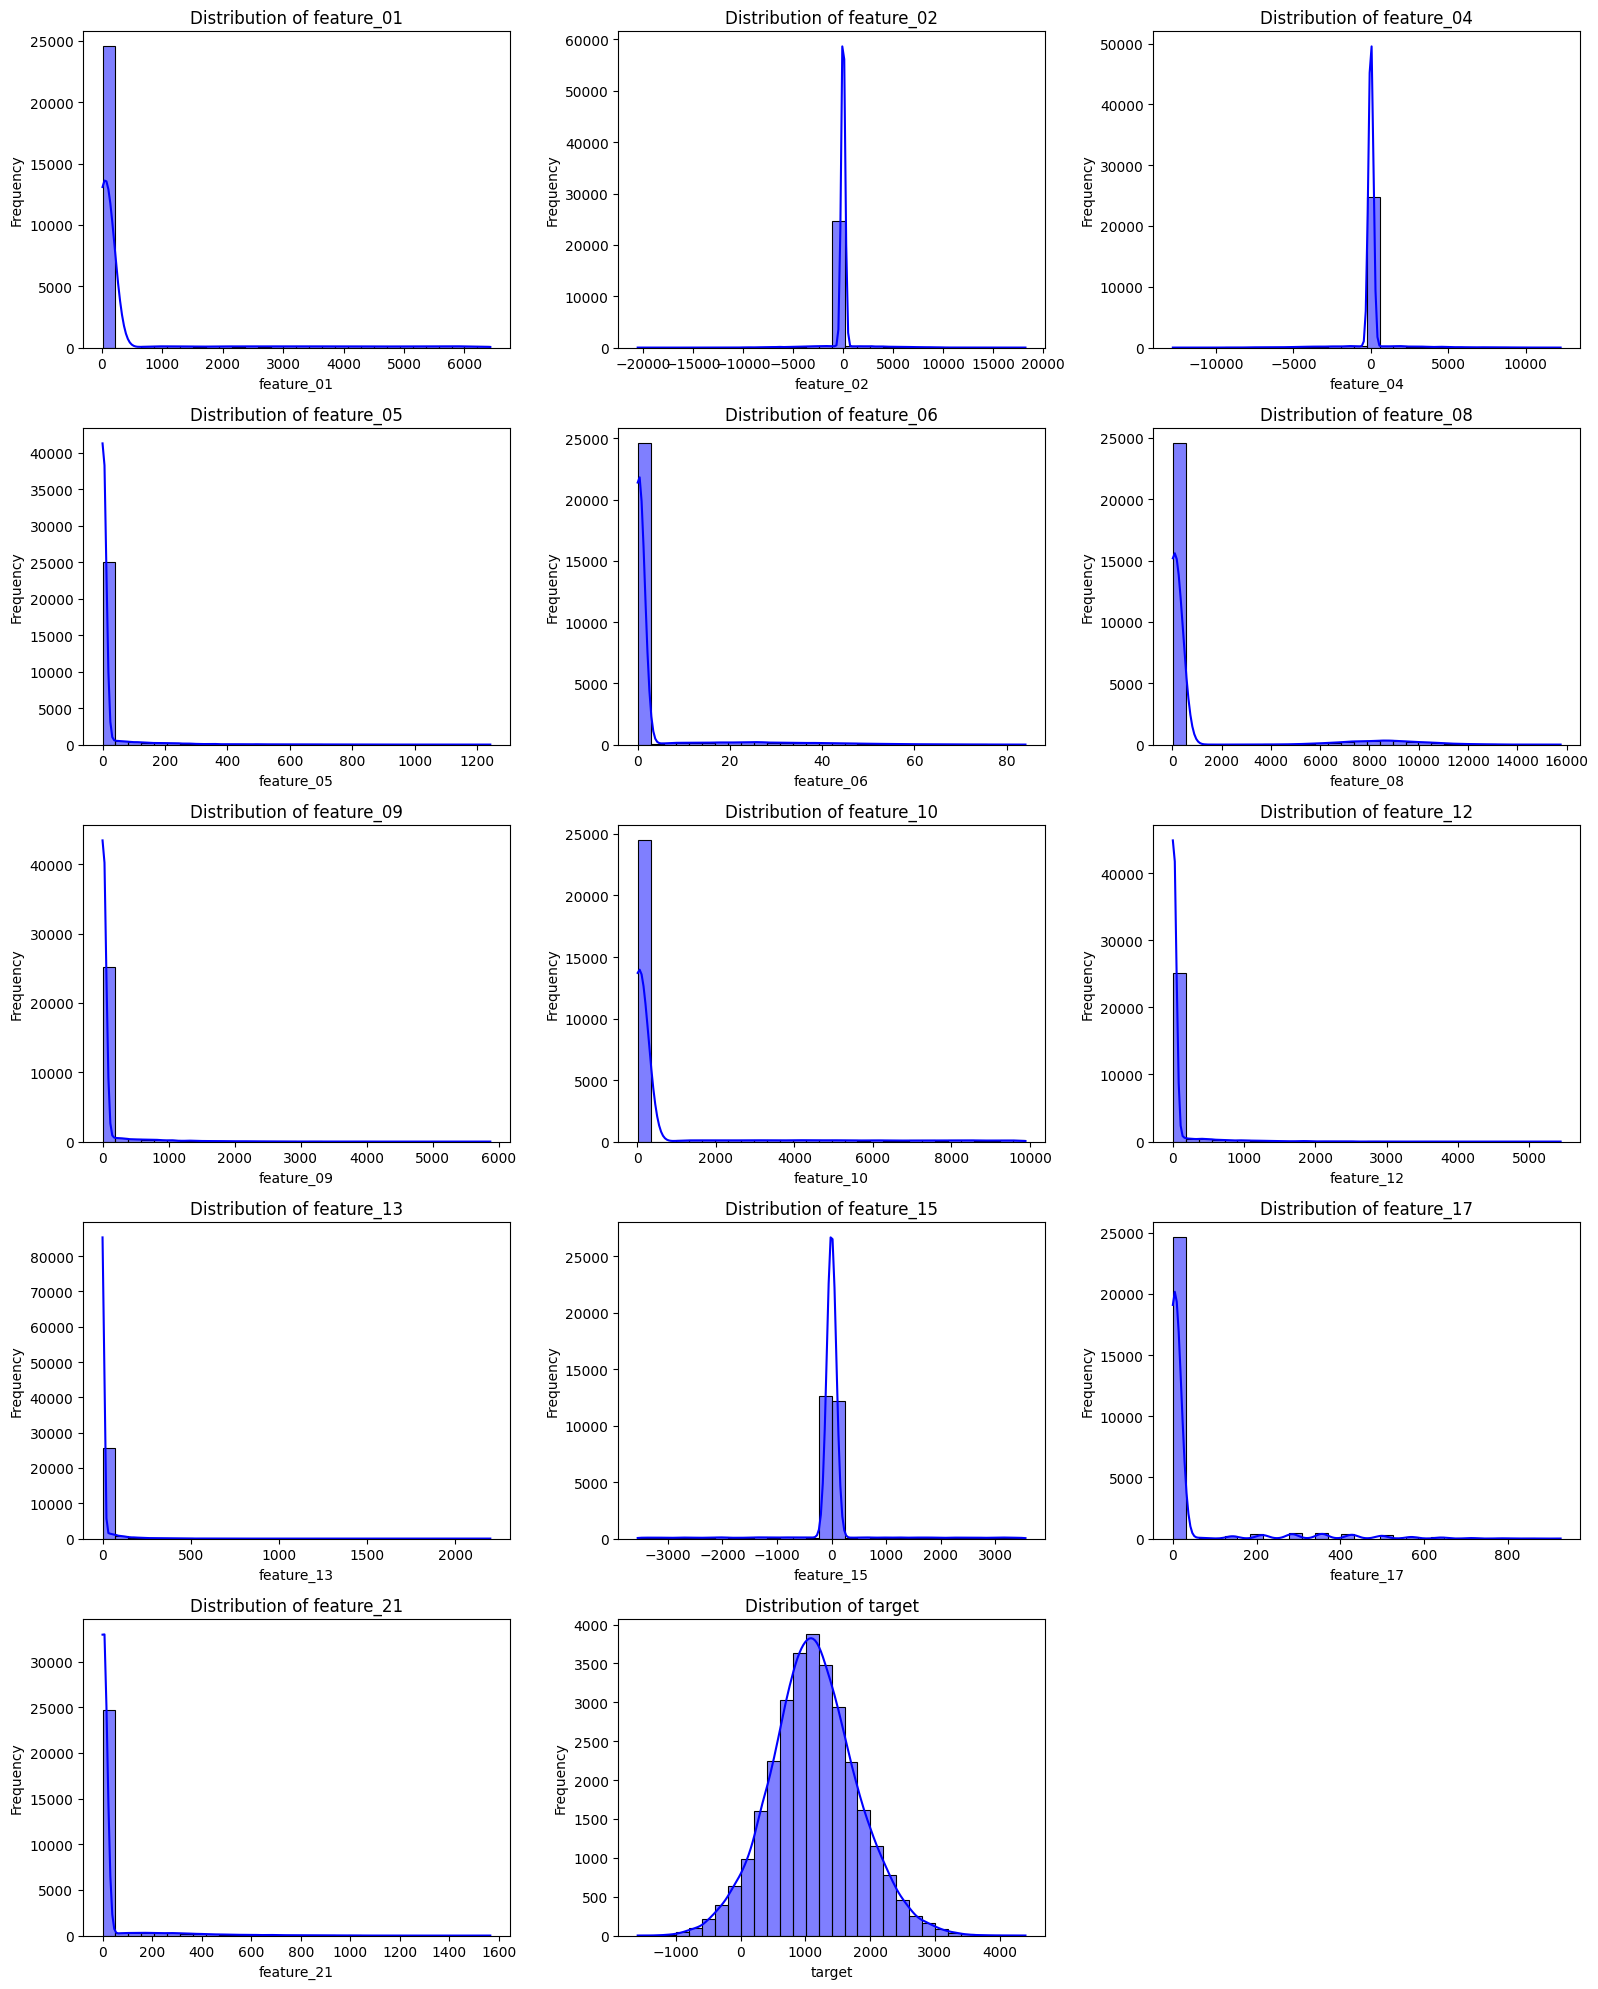

In [4]:
numerical_features = [col for col in numerical_features if col.lower() != "id"]

num_features = len(numerical_features)
cols = 3  
rows = (num_features + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  

for i, col in enumerate(numerical_features):
    ax = axes[i // cols, i % cols] 
    sns.histplot(df[col], kde=True, bins=30, color="blue", ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")


for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Let's identify the values in the categorical variables.

In [7]:
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values which are: {list(df[col].unique())}")


feature_03: 6 unique values which are: ['u', nan, 'q', 't', 'r', 's', 'p']
feature_07: 6 unique values which are: ['B1', 'B3', 'B6', 'B5', 'B4', 'B2', nan]
feature_11: 4 unique values which are: ['xy', nan, 'yy', 'xx', 'yx']
feature_14: 4 unique values which are: ['ij', 'ii', 'ji', 'jj']
feature_16: 5 unique values which are: ['C3', 'C1', 'C2', nan, 'C4', 'C5']
feature_18: 8 unique values which are: ['A2', 'A4', 'A5', 'A8', 'A7', 'A1', nan, 'A3', 'A6']
feature_19: 5 unique values which are: ['ab', 'ac', 'ad', nan, 'ae', 'aa']
feature_20: 6 unique values which are: ['D4', 'D1', nan, 'D3', 'D5', 'D6', 'D2']


There are some ordered and non-ordered categorical features.
* **Ordered Features:**  feature_07, feature_16, feature_18, feature_20
* **Non-ordered Features:** feature_03, feature_11, feature_14, feature_19

In [5]:
ordered_features = ['feature_07', 'feature_16', 'feature_18', 'feature_20']
non_ordered_features = ['feature_03', 'feature_11', 'feature_14', 'feature_19']

Now,  use pie charts to visualize the distribution of categorical variables, helping to identify dominant categories, detect imbalances, and understand proportions for better preprocessing decisions.

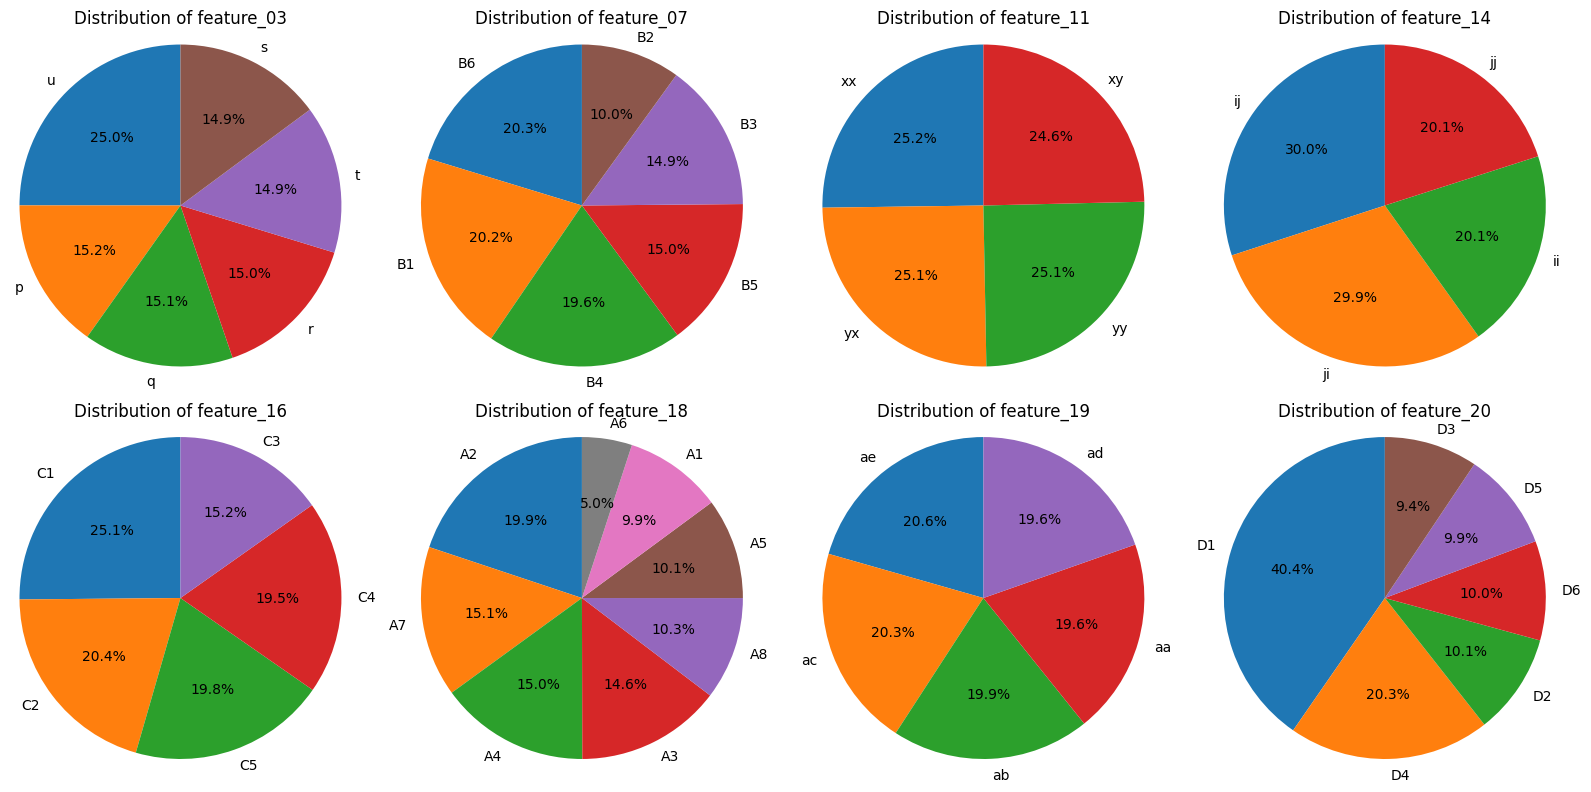

In [9]:
cols = 4 # Four pie chart in each line
num_features = len(categorical_features)
rows = (num_features + cols - 1) // cols  # calculate the line number

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  
axes = axes.flatten()  # Tüm eksenleri düzleştir


for i, col in enumerate(categorical_features):
    values = df[col].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].axis('equal')  #


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* **feature_03**: The categories are well-balanced, ranging between 14.9% and 25%, making it suitable for modeling.

* **feature_07**: The categories are mostly balanced, though "B2" is slightly underrepresented at 10%.

* **feature_11**: All four categories have similar proportions, indicating a very balanced distribution.

* **feature_14**: Two categories (30% and 29.9%) are slightly dominant, but the overall distribution is fairly balanced.

* **feature_16**: The distribution is balanced, with the highest category at 25.1% and the lowest at 15.2%.

* **feature_18**: "A6" is significantly underrepresented at 5%, while the other categories have similar proportions.

* **feature_19**: The categories are well-balanced, ranging from 19.6% to 20.6%.

* **feature_20**: "D1" is dominant at 40.4%, with the other categories at around 10%, indicating a notable imbalance.

## Handling Missing Values

In [10]:
df.isnull().sum()

id               0
feature_01    2848
feature_02    2864
feature_03    2805
feature_04    2890
feature_05    2870
feature_06    2842
feature_07    2830
feature_08    2880
feature_09    2875
feature_10    2907
feature_11    2848
feature_12    2884
feature_13    2854
feature_14       0
feature_15    2823
feature_16    2863
feature_17    2847
feature_18    2858
feature_19    2848
feature_20    2833
feature_21    2904
target           0
dtype: int64

By calculating the proportion of missing values, we can identify which features have serious deficiencies.

In [11]:
missing_percentages = df.isnull().mean() * 100
print(missing_percentages)

id            0.000000
feature_01    9.493333
feature_02    9.546667
feature_03    9.350000
feature_04    9.633333
feature_05    9.566667
feature_06    9.473333
feature_07    9.433333
feature_08    9.600000
feature_09    9.583333
feature_10    9.690000
feature_11    9.493333
feature_12    9.613333
feature_13    9.513333
feature_14    0.000000
feature_15    9.410000
feature_16    9.543333
feature_17    9.490000
feature_18    9.526667
feature_19    9.493333
feature_20    9.443333
feature_21    9.680000
target        0.000000
dtype: float64


###  Missing Values in Categorical Features

The best way to handle missing values ​​in categorical features is to fill in each categorical feature with its own mode value. However, the categorical features appear to have balanced distributions. Considering the missing value percentage is around 10%, filling the missing values with the mode might disrupt this balance. Therefore, using random sampling to fill the missing values seems to be a more reasonable approach.


Random sampling fills missing values by randomly selecting one of the existing values in the feature (from non-missing values). This ensures that the original distribution of the data is preserved without introducing bias.



In [6]:
feature_distributions_with_missingvalues = {}

for col in categorical_features:
    value_counts = df[col].value_counts(normalize=True) * 100  
    feature_distributions_with_missingvalues[col] = value_counts.to_dict() 



Now, do random sampling.

In [7]:
np.random.seed(28)

for col in categorical_features:
    df[col] = df[col].apply(lambda x: np.random.choice(df[col].dropna().unique()) if pd.isnull(x) else x)

In [8]:
feature_distributions_without_missingvalues = {}

for col in categorical_features:
    value_counts = df[col].value_counts(normalize=True) * 100  
    feature_distributions_without_missingvalues[col] = value_counts.to_dict() 



This code saves the distributions of categorical features as dictionaries before random sampling. After applying random sampling, these distributions can be compared with the original ones to ensure the balance is preserved.

In [9]:
for feature in feature_distributions_with_missingvalues.keys():
    original = feature_distributions_with_missingvalues[feature]  
    updated = feature_distributions_without_missingvalues[feature]  
    
    print(f"Feature: {feature}")
    for category in original.keys():
        original_value = original.get(category, 0)
        updated_value = updated.get(category, 0)
        difference = abs(original_value - updated_value)  
        print(f"  {category}: Original = {original_value:.4f}, Updated = {updated_value:.4f}, Difference = {difference:.4f}")
    print("\n")

Feature: feature_03
  u: Original = 24.9899, Updated = 24.1400, Difference = 0.8499
  p: Original = 15.1903, Updated = 15.3967, Difference = 0.2064
  q: Original = 15.0726, Updated = 15.1500, Difference = 0.0774
  r: Original = 15.0175, Updated = 15.0833, Difference = 0.0659
  t: Original = 14.8741, Updated = 15.1133, Difference = 0.2393
  s: Original = 14.8557, Updated = 15.1167, Difference = 0.2610


Feature: feature_07
  B6: Original = 20.2834, Updated = 20.0133, Difference = 0.2701
  B1: Original = 20.1877, Updated = 19.9200, Difference = 0.2677
  B4: Original = 19.6393, Updated = 19.2900, Difference = 0.3493
  B5: Original = 15.0313, Updated = 15.1067, Difference = 0.0754
  B3: Original = 14.8877, Updated = 15.0000, Difference = 0.1123
  B2: Original = 9.9706, Updated = 10.6700, Difference = 0.6994


Feature: feature_11
  xx: Original = 25.2173, Updated = 25.3267, Difference = 0.1094
  yx: Original = 25.0810, Updated = 25.1700, Difference = 0.0890
  yy: Original = 25.0773, Updated

There does not seem to be much change in the distributions, we managed to preserve the distribution of the data for categorical features.

Also, note that there is no difference in feature_14 because it does not contain any missing value.




### Handling in Numerical Features


Based on the histograms above for the numerical features, filling missing values with the median for numerical features seems logical. This approach minimizes the impact of outliers on skewed distributions and better preserves the overall structure of the data.

In [10]:
for col in numerical_features:
    if df[col].isnull().sum() > 0:  
        df[col].fillna(df[col].median(), inplace=True)


In [17]:
print(df.isnull().sum())

id            0
feature_01    0
feature_02    0
feature_03    0
feature_04    0
feature_05    0
feature_06    0
feature_07    0
feature_08    0
feature_09    0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
target        0
dtype: int64


All missing values have been successfully handled. Numerical features were filled with their median values to preserve the data's structure and minimize the impact of outliers. The dataset is now complete and ready for further preprocessing. So, which encoding method should we choose now?

We chose One-Hot Encoding to prevent regression models from misinterpreting categorical features as having an ordinal relationship. This method ensures that categories are treated as independent entities by creating separate binary columns, making it more suitable for Linear Regression, Polynomial Regression, and Support Vector Regression (SVR). It improves feature representation and ensures accurate model performance.

## Analysis of Categorical Features

Before dealing with redundant and irrelevant features, we will convert our categorical features into numerical ones. The reason for this is that our dataset is abstract, and we don't fully understand the exact meaning of the categorical features. Therefore, using this data as numeric will be more logical for us and will make our work a bit easier.

In [11]:
one_hot_encoded_df = pd.get_dummies(df[non_ordered_features], drop_first=True)

df = pd.concat([df, one_hot_encoded_df], axis=1)

df.drop(columns=non_ordered_features, inplace=True)



In [12]:
boolean_columns = df.select_dtypes(include=['bool']).columns

df[boolean_columns] = df[boolean_columns].astype(int)

df.head()

,id,feature_01,feature_02,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_11_xy,feature_11_yx,feature_11_yy,feature_14_ij,feature_14_ji,feature_14_jj,feature_19_ab,feature_19_ac,feature_19_ad,feature_19_ae
0,1,43.71,-90.85,-28.35,0.20,0.24,B1,102.89,14.65,30.56,...,1,0,0,1,0,0,1,0,0,0
1,2,95.56,-9.20,-14.07,0.91,0.04,B3,106.68,2.41,7512.06,...,0,0,0,1,0,0,0,1,0,0
2,3,75.88,-0.02,-8.50,0.50,0.13,B3,70.79,3.10,13.32,...,1,0,0,0,0,0,1,0,0,0
3,4,63.88,-0.02,0.32,3.07,0.36,B6,90.18,1.07,59.61,...,0,0,1,0,1,0,0,0,1,0
4,5,24.04,-41.22,-32.25,4.86,0.42,B5,119.19,8.07,82.79,...,0,0,1,0,0,1,0,1,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ordered_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le 

df.head()


,id,feature_01,feature_02,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_11_xy,feature_11_yx,feature_11_yy,feature_14_ij,feature_14_ji,feature_14_jj,feature_19_ab,feature_19_ac,feature_19_ad,feature_19_ae
0,1,43.71,-90.85,-28.35,0.20,0.24,0,102.89,14.65,30.56,...,1,0,0,1,0,0,1,0,0,0
1,2,95.56,-9.20,-14.07,0.91,0.04,2,106.68,2.41,7512.06,...,0,0,0,1,0,0,0,1,0,0
2,3,75.88,-0.02,-8.50,0.50,0.13,2,70.79,3.10,13.32,...,1,0,0,0,0,0,1,0,0,0
3,4,63.88,-0.02,0.32,3.07,0.36,5,90.18,1.07,59.61,...,0,0,1,0,1,0,0,0,1,0
4,5,24.04,-41.22,-32.25,4.86,0.42,4,119.19,8.07,82.79,...,0,0,1,0,0,1,0,1,0,0


The target column is not in the end of the dataframe.

In [14]:
target_column = 'target'
columns = [col for col in df.columns if col != target_column] + [target_column]
df = df[columns]

df.head()

,id,feature_01,feature_02,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_11_yx,feature_11_yy,feature_14_ij,feature_14_ji,feature_14_jj,feature_19_ab,feature_19_ac,feature_19_ad,feature_19_ae,target
0,1,43.71,-90.85,-28.35,0.20,0.24,0,102.89,14.65,30.56,...,0,0,1,0,0,1,0,0,0,357.98
1,2,95.56,-9.20,-14.07,0.91,0.04,2,106.68,2.41,7512.06,...,0,0,1,0,0,0,1,0,0,1103.49
2,3,75.88,-0.02,-8.50,0.50,0.13,2,70.79,3.10,13.32,...,0,0,0,0,0,1,0,0,0,501.38
3,4,63.88,-0.02,0.32,3.07,0.36,5,90.18,1.07,59.61,...,0,1,0,1,0,0,0,1,0,1174.88
4,5,24.04,-41.22,-32.25,4.86,0.42,4,119.19,8.07,82.79,...,0,1,0,0,1,0,1,0,0,1350.99


Now that we have converted all our features to numerical, we can focus on redundant and irrelevant features.

## Redundant Features

To identify redundant features, we will first look at the correlation matrix, which will show how correlated a feature is with another. Then, we will analyze multicollinearity.

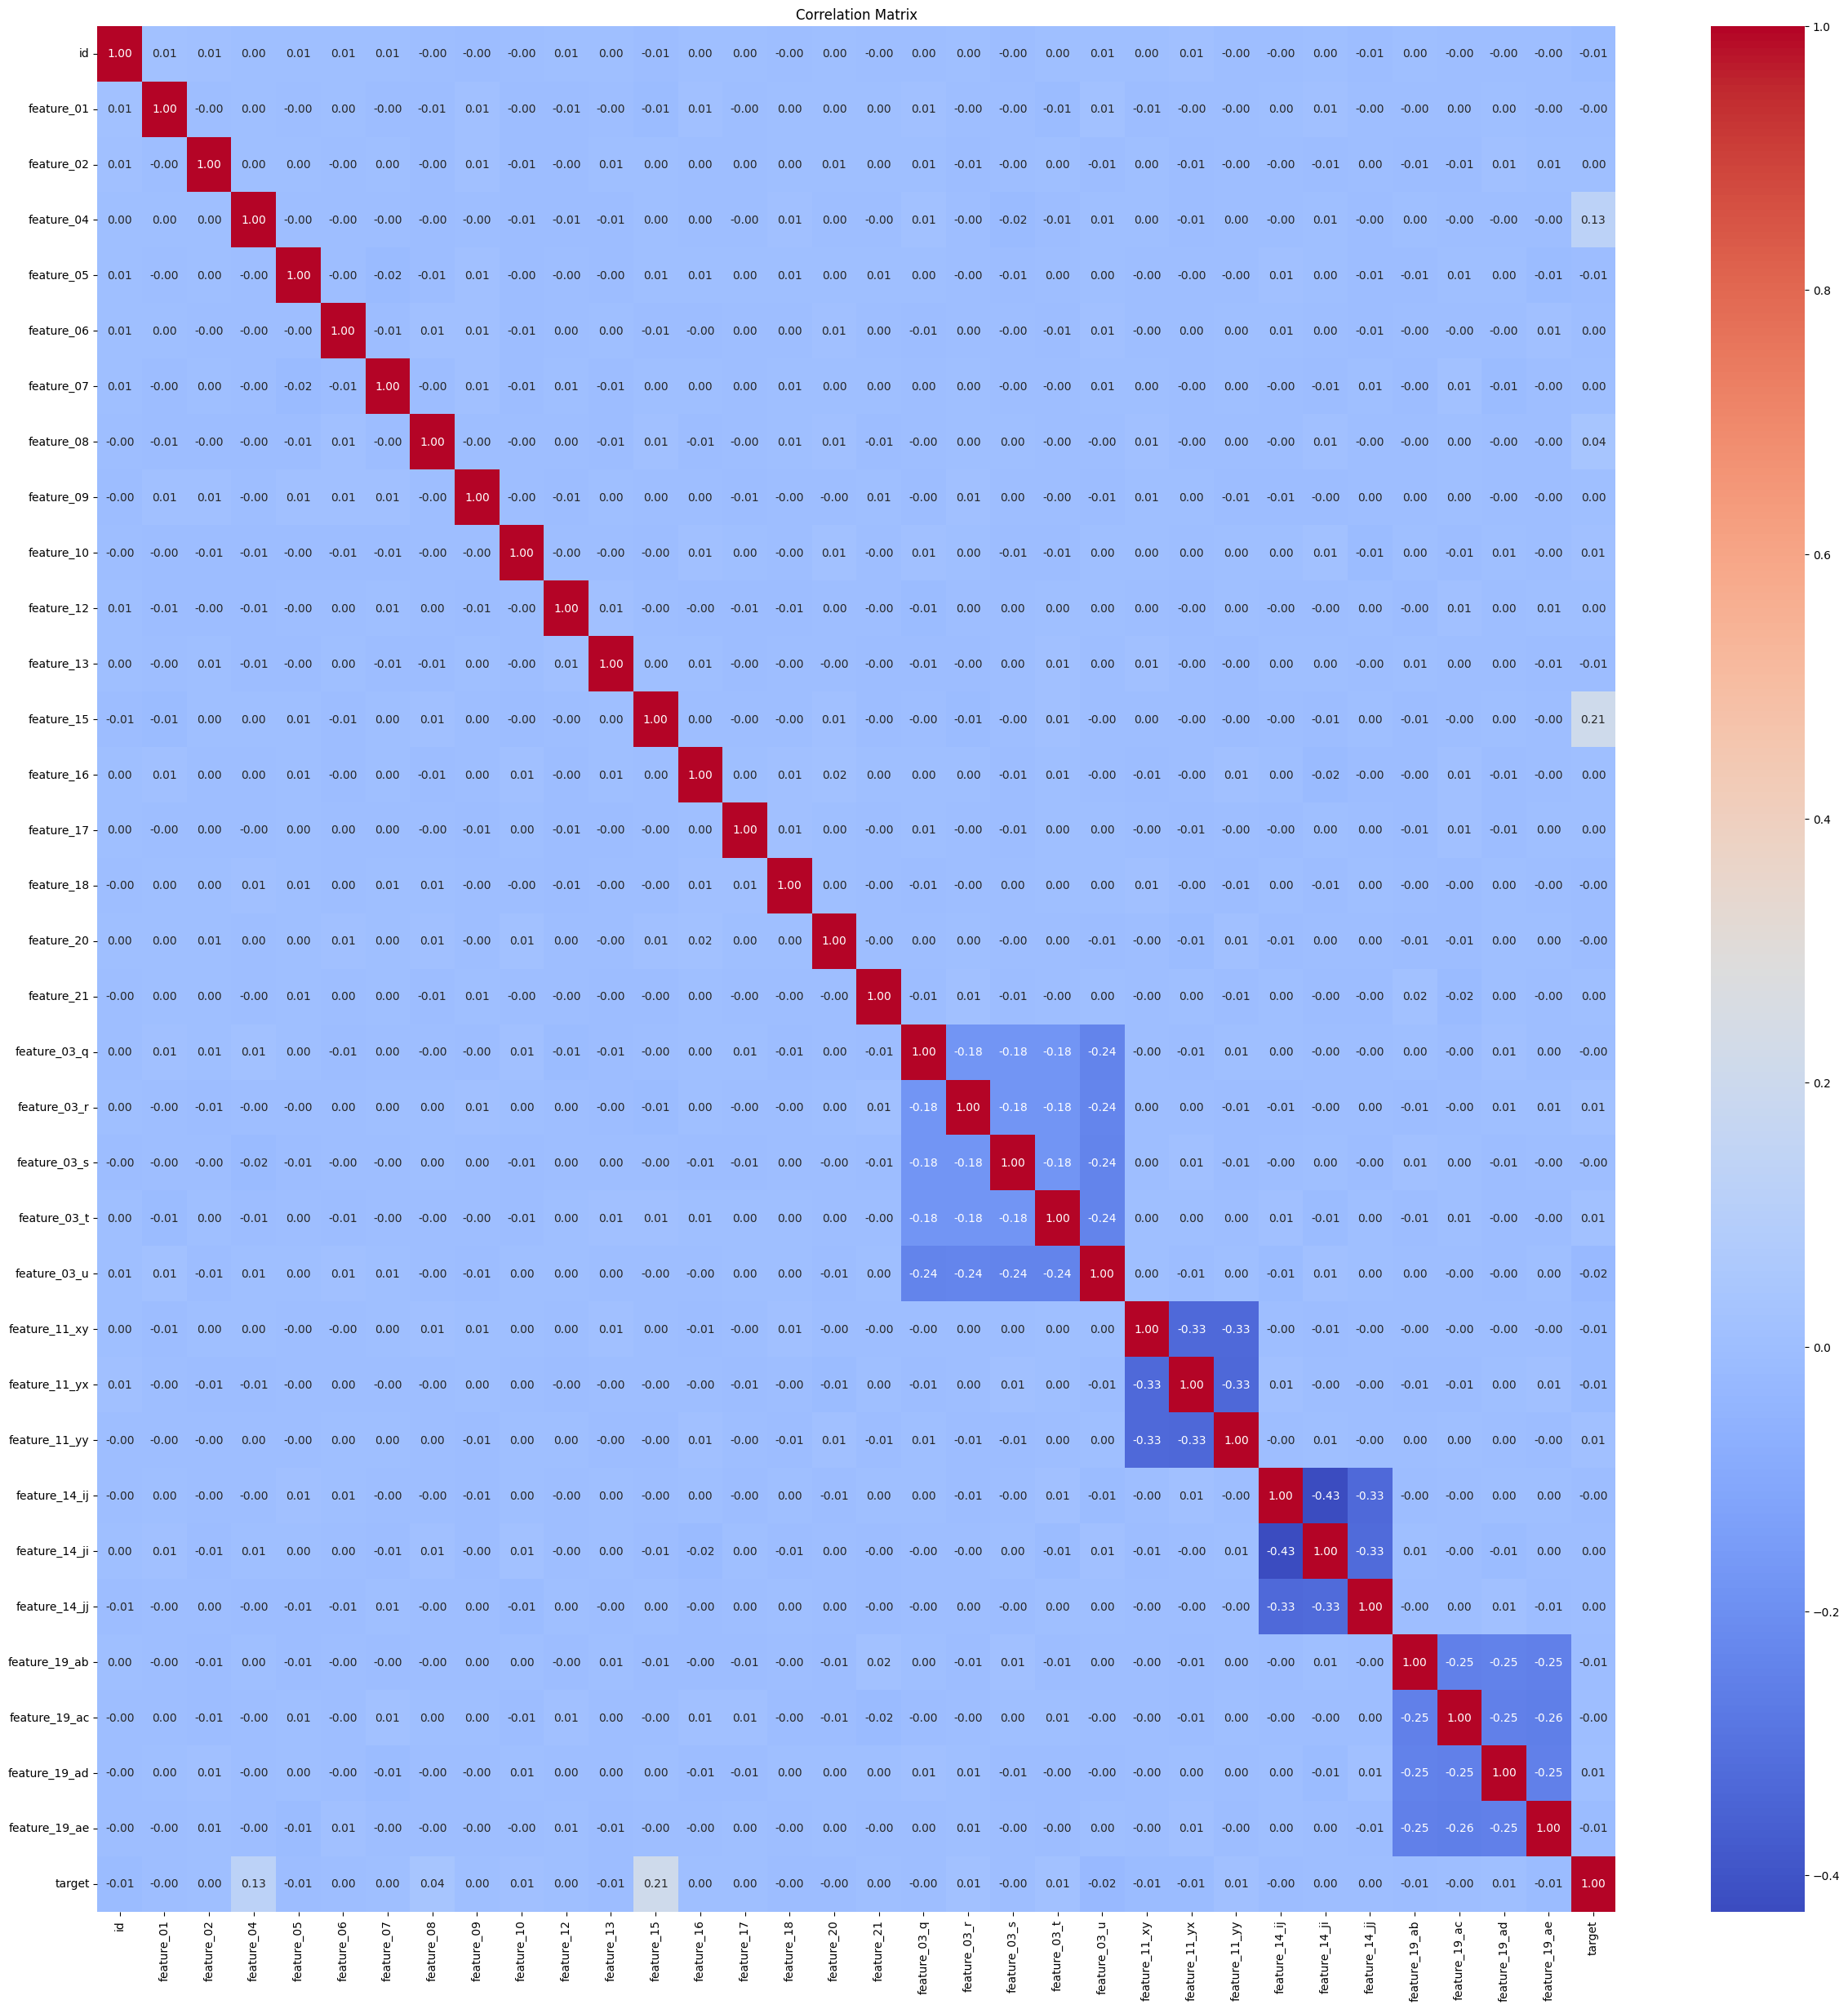

In [22]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

When we look at the correlation matrix, only the separated categorical features seem to be slightly correlated with each other, which is quite normal. Apart from that, the other features show almost no correlation. Therefore, we will now examine multicollinearity.

Variance Inflation Factor (VIF) measures how strongly a feature is linearly correlated with other features in a dataset, helping to detect multi-collinearity issues. To calculate VIF, each feature is regressed on all other features, and $R^2$  value of this regression is used in the formula $VIF = 1/(1-R^2)$. An $R^2$ value close to 1 indicates that the feature can be predicted well by other features, leading to a higher VIF. VIF is interpreted as follows: a value of 1 indicates no multi-collinearity, a value above 5 suggests moderate multi-collinearity, and values above 10 indicate serious multi-collinearity that may require action, such as feature removal.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))  

vif_data = pd.DataFrame()
vif_data["Feature"] = df.drop(columns=['target']).columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

          Feature       VIF
0              id  1.000958
1      feature_01  1.001416
2      feature_02  1.001043
3      feature_04  1.000929
4      feature_05  1.001252
5      feature_06  1.000879
6      feature_07  1.001284
7      feature_08  1.000830
8      feature_09  1.001161
9      feature_10  1.001218
10     feature_12  1.000873
11     feature_13  1.000752
12     feature_15  1.000918
13     feature_16  1.001447
14     feature_17  1.000723
15     feature_18  1.000864
16     feature_20  1.001189
17     feature_21  1.001004
18   feature_03_q  1.684984
19   feature_03_r  1.682474
20   feature_03_s  1.683176
21   feature_03_t  1.683101
22   feature_03_u  1.949779
23  feature_11_xy  1.487123
24  feature_11_yx  1.493503
25  feature_11_yy  1.490752
26  feature_14_ij  1.749109
27  feature_14_ji  1.748779
28  feature_14_jj  1.599694
29  feature_19_ab  1.616078
30  feature_19_ac  1.623825
31  feature_19_ad  1.611228
32  feature_19_ae  1.627246


There is no redundant features.

## Irrelevant Features

In [15]:
correlations = df.corr()["target"].drop(["target", "id"])
print("Correlations with target:\n", correlations)

# Filter features with low correlation (e.g., |correlation| < 0.01)
low_corr_features = correlations[abs(correlations) < 0.01].index
print("Features with low correlation to the target:", list(low_corr_features))

Correlations with target:
 feature_01      -0.000847
feature_02       0.002467
feature_04       0.128168
feature_05      -0.005703
feature_06       0.001043
feature_07       0.004507
feature_08       0.035595
feature_09       0.004094
feature_10       0.007684
feature_12       0.004222
feature_13      -0.005263
feature_15       0.213282
feature_16       0.004601
feature_17       0.004115
feature_18      -0.004226
feature_20      -0.004802
feature_21       0.004557
feature_03_q    -0.001401
feature_03_r     0.013524
feature_03_s    -0.000033
feature_03_t     0.013390
feature_03_u    -0.020425
feature_11_xy   -0.012174
feature_11_yx   -0.010326
feature_11_yy    0.010650
feature_14_ij   -0.003932
feature_14_ji    0.000022
feature_14_jj    0.000666
feature_19_ab   -0.006081
feature_19_ac   -0.001760
feature_19_ad    0.005092
feature_19_ae   -0.012243
Name: target, dtype: float64
Features with low correlation to the target: ['feature_01', 'feature_02', 'feature_05', 'feature_06', 'feature_0

There are so many features with low correlation to the target. We need to investigate more.

Now, we will use Mutual Information for a further investigation about irrelevant features. Mutual Information is a statistical measure that quantifies the amount of shared information between two variables, capturing both linear and non-linear dependencies. It evaluates how much knowing one variable reduces uncertainty about another. MI is non-negative and symmetric, with a value of zero indicating no dependence between the variables. It is commonly used in feature selection to assess the relevance of features to a target variable, with higher MI scores indicating stronger relationships. Unlike correlation, MI can capture complex, non-linear interactions, making it a versatile tool for dependency analysis, information gain, and clustering. 

Mutual Information (MI) measures the shared information between two random variables, quantifying how much knowing one variable reduces uncertainty about the other. It is based on the concept of entropy, which represents the amount of uncertainty or randomness in a variable. There are soem definitions to compute Mutual Information on the following.

1. **Entropy ($H$):**
   - Entropy quantifies the uncertainty in a random variable.

     $$
     H(X) = - \sum_{x \in X} P(x) \log P(x)
     $$

2. **Joint Entropy ($H(X, Y)$):**
   - Measures the uncertainty in the combined distribution of $X$ and $Y$.

     $$
     H(X, Y) = - \sum_{x \in X} \sum_{y \in Y} P(x, y) \log P(x, y)
     $$

4. **Mutual Information ($MI$):**
   - Defined as the reduction in uncertainty of $Y$ given $X$, or equivalently:

     $$
     MI(X, Y) = H(X) + H(Y) - H(X, Y)
     $$

   - Alternatively:

     $$
     MI(X, Y) = \sum_{x \in X} \sum_{y \in Y} P(x, y) \log \left( \frac{P(x, y)}{P(x) P(y)} \right)
     $$
) P(y)} \right)
     $$
    $$
y)
$$

​



$ MI(X,Y)= 0 $ if $ 𝑋 $ and $ 𝑌 $ are independent which means that X is irrelevant with Y where is the target variable.

In [16]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(df.drop(columns=['target']), df['target'])
mi_scores = pd.Series(mi_scores, index=df.drop(columns='target').columns)
print(mi_scores.sort_values(ascending=False))

feature_15       0.306269
feature_08       0.214700
feature_04       0.080943
feature_16       0.006256
feature_02       0.003565
feature_07       0.002809
feature_03_u     0.002405
feature_14_ij    0.002136
feature_10       0.002033
feature_03_s     0.001992
id               0.001669
feature_14_jj    0.001253
feature_03_q     0.001224
feature_11_yy    0.001086
feature_11_xy    0.001007
feature_13       0.000878
feature_19_ac    0.000758
feature_18       0.000508
feature_19_ad    0.000135
feature_14_ji    0.000000
feature_19_ab    0.000000
feature_11_yx    0.000000
feature_20       0.000000
feature_03_t     0.000000
feature_03_r     0.000000
feature_21       0.000000
feature_01       0.000000
feature_17       0.000000
feature_12       0.000000
feature_09       0.000000
feature_06       0.000000
feature_05       0.000000
feature_19_ae    0.000000
dtype: float64


I will only remove the features where the mutual information scores are equal to 0. Apart from feature_15, feature_8, and feature_4, the other features don’t seem to contribute much, and they might even be detrimental. However, since the dataset is abstract, I can't be completely certain about this because I have no knowledge about the characteristics of the features. Therefore, I will only remove the features with mutual information scores of 0. At the end, I will also run my best-performing model using only these three features to analyze the situation from this perspective.

In [17]:
relevant_features = mi_scores[mi_scores > 0.00].index

df_filtered = df[relevant_features.to_list() + ['target']]

print("Mutual Information Scores:")
print(mi_scores[mi_scores > 0.00])

Mutual Information Scores:
id               0.001669
feature_02       0.003565
feature_04       0.080943
feature_07       0.002809
feature_08       0.214700
feature_10       0.002033
feature_13       0.000878
feature_15       0.306269
feature_16       0.006256
feature_18       0.000508
feature_03_q     0.001224
feature_03_s     0.001992
feature_03_u     0.002405
feature_11_xy    0.001007
feature_11_yy    0.001086
feature_14_ij    0.002136
feature_14_jj    0.001253
feature_19_ac    0.000758
feature_19_ad    0.000135
dtype: float64


In [18]:
df_filtered= df_filtered.drop(columns= ['id'])
df_filtered

,feature_02,feature_04,feature_07,feature_08,feature_10,feature_13,feature_15,feature_16,feature_18,feature_03_q,feature_03_s,feature_03_u,feature_11_xy,feature_11_yy,feature_14_ij,feature_14_jj,feature_19_ac,feature_19_ad,target
0,-90.85,-28.35,0,102.89,30.56,2.98,5.29,2,1,0,0,1,1,0,1,0,0,0,357.98
1,-9.20,-14.07,2,106.68,7512.06,0.86,-12.72,0,3,1,0,0,0,0,1,0,1,0,1103.49
2,-0.02,-8.50,2,70.79,13.32,7.83,-3.47,1,4,0,0,1,1,0,0,0,0,0,501.38
3,-0.02,0.32,5,90.18,59.61,0.73,31.65,0,7,1,0,0,0,1,0,0,0,1,1174.88
4,-41.22,-32.25,4,119.19,82.79,1.12,-12.25,1,6,0,0,0,0,1,0,1,1,0,1350.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.02,7822.04,1,110.81,58.58,123.04,-20.34,2,1,0,1,0,0,1,0,0,1,0,1756.51
29996,31.39,32.65,4,102.89,99.44,2.63,-0.16,2,6,1,0,0,0,0,1,0,0,0,2048.25
29997,-37.90,0.32,5,67.71,65.45,1.44,411.17,4,4,0,1,0,0,0,1,0,0,0,508.91
29998,34.72,-36.70,5,60.69,52.74,0.87,13.01,3,6,0,0,0,1,0,0,0,0,0,324.74


## Outlier Detection 

Outlier detection is not applicable for coded categorical features, because coded values ​​are just representations and do not carry any statistically significant properties. Therefore, we first need to find the original numerical features we have.

In [28]:
filtered_numerical = []
for feature in numerical_features:
    if feature in df_filtered:
        if feature != 'target':
            filtered_numerical.append(feature)


print(filtered_numerical)
        
        

['feature_02', 'feature_04', 'feature_08', 'feature_10', 'feature_13', 'feature_15']


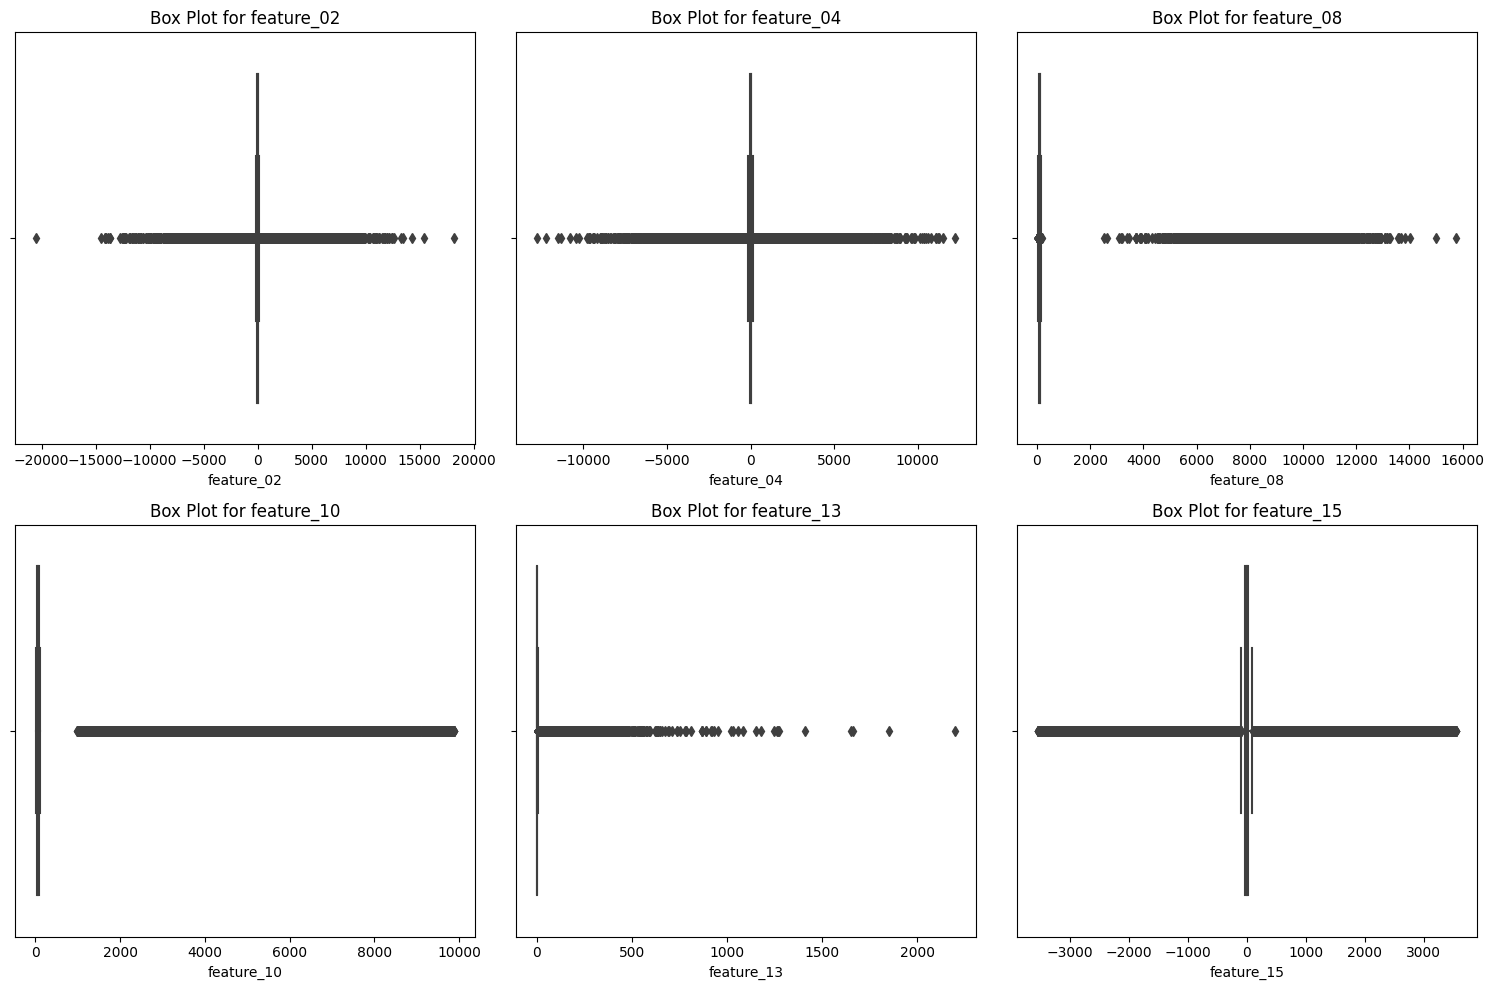

In [29]:
num_cols = len(filtered_numerical)

# Determine grid size: 3 boxplots per row
rows = (num_cols // 3) + (1 if num_cols % 3 > 0 else 0)

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Plot boxplots
for idx, feature in enumerate(filtered_numerical):
    row, col = divmod(idx, 3)
    sns.boxplot(data=df_filtered, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot for {feature}")

# Remove unused subplots
for idx in range(num_cols, rows * 3):
    fig.delaxes(axes.flatten()[idx])

# Adjust layout and display
plt.tight_layout()
plt.show()

Print the number of outliers for each category and their percentage.

In [30]:
Q1 = df_filtered[filtered_numerical].quantile(0.25)
Q3 = df_filtered[filtered_numerical].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df_filtered[filtered_numerical] < lower_bound) | (df_filtered[filtered_numerical] > upper_bound)

outlier_percentage = (outliers.sum() / len(df_filtered[filtered_numerical])) * 100

print(outlier_percentage.sort_values(ascending=False))

feature_13    13.146667
feature_08     9.243333
feature_02     9.063333
feature_04     8.930000
feature_10     8.720000
feature_15     8.280000
dtype: float64


There are a lot of outliers, almost in every column, with approximately 10% of the data being outliers. Considering that each feature's outlier values might occur in different rows, it means we have rows containing far more than 10% outlier values. Therefore, I will proceed with two different approaches.

My first approach will be to leave the outliers untouched. The second approach will involve applying capping to the outliers. The reason for this is that due to the abstract nature of the dataset, we don't fully understand the characteristics of the features. Most likely, when we apply capping, there won’t be much difference while training the models in neural networks, but when we predict using the test dataset, we might observe significant deviations. However, in regression machine learning models, the capping increasede accuracy in the traning part, but in the submission part, they fail probabaly.

Additionally, the outliers seem to be spread across a very large range and are almost continuously distributed. The fact that the data is concentrated around a certain center might be making these values appear as outliers, but in reality, they could be meaningful. For this reason, I decided to continue with the two approaches mentioned above.

In [20]:
df_capped = df_filtered.copy()

# Cap outliers only in the specified columns
for col in filtered_numerical:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df_capped[col] = df_filtered[col].clip(lower=lower_bound, upper=upper_bound)

# Display summary of capped columns
print("Summary of capped columns:")
print(df_capped[filtered_numerical].describe())


NameError: name 'filtered_numerical' is not defined

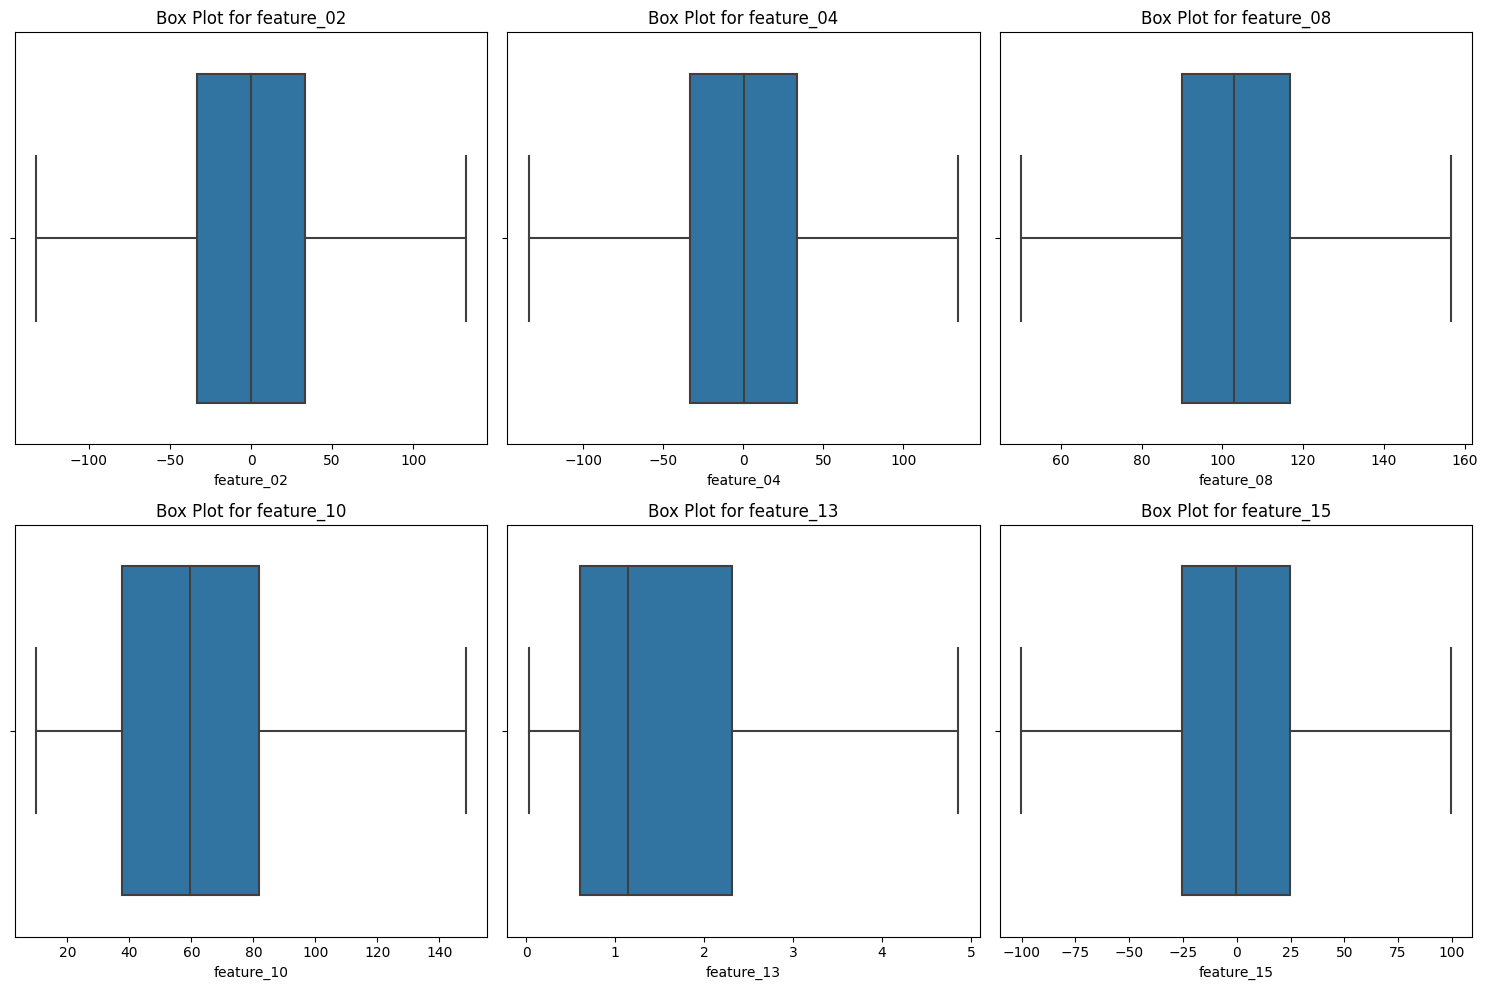

In [32]:
rows = (num_cols // 3) + (1 if num_cols % 3 > 0 else 0)

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Plot boxplots
for idx, feature in enumerate(filtered_numerical):
    row, col = divmod(idx, 3)
    sns.boxplot(data=df_capped, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot for {feature}")

# Remove unused subplots
for idx in range(num_cols, rows * 3):
    fig.delaxes(axes.flatten()[idx])

# Adjust layout and display
plt.tight_layout()
plt.show()

In [33]:
df_capped.head()

,feature_02,feature_04,feature_07,feature_08,feature_10,feature_13,feature_15,feature_16,feature_18,feature_03_q,feature_03_s,feature_03_u,feature_11_xy,feature_11_yy,feature_14_ij,feature_14_jj,feature_19_ac,feature_19_ad,target
0,-90.85,-28.35,0,102.89,30.56000,2.98,5.29,2,1,0,0,1,1,0,1,0,0,0,357.98
1,-9.20,-14.07,2,106.68,148.54375,0.86,-12.72,0,3,1,0,0,0,0,1,0,1,0,1103.49
2,-0.02,-8.50,2,70.79,13.32000,4.86,-3.47,1,4,0,0,1,1,0,0,0,0,0,501.38
3,-0.02,0.32,5,90.18,59.61000,0.73,31.65,0,7,1,0,0,0,1,0,0,0,1,1174.88
4,-41.22,-32.25,4,119.19,82.79000,1.12,-12.25,1,6,0,0,0,0,1,0,1,1,0,1350.99


# Machine Learning Algorithms

We prepared our data to achieve better efficiency when feeding it into the models. In this section, we will train our data with some machine learning algorithms, including Linear Regression, Polynomial Regression, and Support Vector Regression models. Afterwards, we will compare the performance of these models.

## Linear Regression

It is a fundamental statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that the relationship between the variables is linear, meaning it can be represented as a straight line. The general equation for simple linear regression is $$ y = \beta_0 + \beta_1 x + \epsilon $$ , where $y$ is the target, $x$ is the independent variable, $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\epsilon$ represents the error term. In multiple linear regression, this extends to include multiple independent variables. The goal of linear regression is to find the values of the coefficients $(\beta_0, \beta_1, ...)$ that minimize the difference between the predicted values and the actual values, typically by minimizing the **Mean Squared Error (MSE)**. This method is widely used in predictive modeling and data analysis due to its simplicity, interpretability, and efficiency for datasets with linear relationships.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_capped.drop(columns=['target'])  
y = df_capped['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 427046.5364362154


In [43]:
X = df_filtered.drop(columns=['target'])  
y = df_filtered['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE) for non-capping data:", mse)

Mean Squared Error (MSE) for non-capping data: 427046.5364362154


As you can see, our error is much higher when we do not apply outlier capping. 

but we will see in the end whether capping is a completely correct method. We are currently comparing the models. Neural network will probably be the model that gives the least error. Therefore, we can consider trying a different outlier handling method there again.

## Polynomial Regression

It is an extension of linear regression that models the relationship between the independent variable(s) and the dependent variable as a polynomial function. Unlike linear regression, which assumes a straight-line relationship, polynomial regression can capture more complex, curved patterns in the data. The general equation for polynomial regression is $$ y = \beta_0x + \beta_1x + \beta_2x^2 ...+ \beta_nx^n + \epsilon $$ , where $𝑛$ is the degree of the polynomial, $β$ are the coefficients, and $𝜖$ represents the error term. By introducing higher-degree terms $(e.g.,𝑥^2,𝑥^3)$, the model can fit non-linear relationships between the features and the target. However, as the degree increases, the model risks overfitting to the training data, so the degree of the polynomial must be carefully chosen based on the complexity of the data and validation performance. Polynomial regression is particularly useful when the data exhibits clear, non-linear trends.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

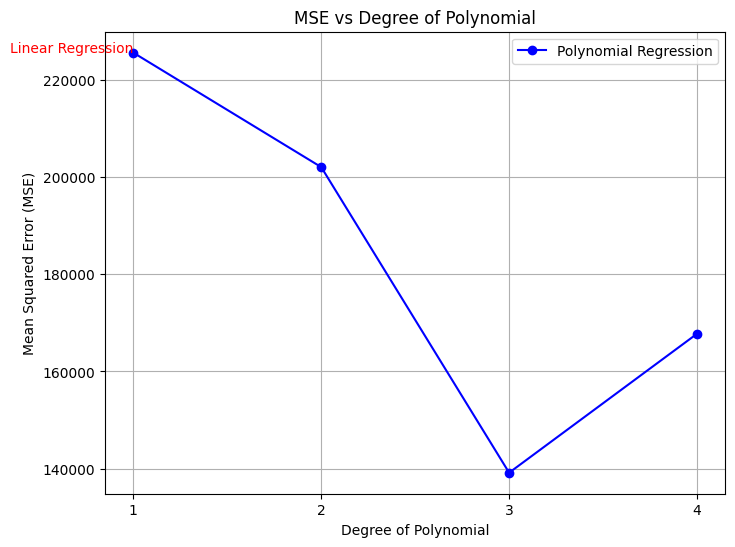

In [36]:
degrees = [1, 2, 3, 4]

# To store mean squared errors for each degree
mse_values = []

# Loop through each degree
for degree in degrees:
    # Create a pipeline with PolynomialFeatures and LinearRegression
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Fit the model on the training data
    polynomial_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = polynomial_model.predict(X_test)
    
    # Calculate MSE and store it
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values against the degrees
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='b', label="Polynomial Regression")

# Annotate degree 1 as Linear Regression
plt.text(1, mse_values[0], "Linear Regression", fontsize=10, color="red", ha='right')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Degree of Polynomial')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

We observe that the minimum value is in the third-degree.

Note that when the degree is equal one, our Polynomial Regression model becomes the Linear Regression model

## Support Vector Regerssion

It is a machine learning algorithm derived from Support Vector Machines (SVM) to predict continuous values. Unlike traditional regression, SVR doesn't aim to minimize the error for all data points but instead fits a function within a margin of tolerance, called **epsilon**, around the true values. Points within this margin are ignored, while only those outside the margin contribute to the loss function.

One of SVR's key strengths is its use of a kernel function, which allows it to model both linear and non-linear relationships. The kernel maps the input data into a higher-dimensional space where it is easier to fit a regression model. Common kernels include:

* **Linear Kernel:** Used for datasets with a linear relationship between features and the target.

* **Polynomial Kernel:** Captures more complex, polynomial relationships.

* **Radial Basis Function (RBF) Kernel:** Suitable for non-linear relationships; it is the most commonly used kernel.

* **Sigmoid Kernel:** Sometimes used for specific types of problems but less common in practice.

The kernel choice depends on the complexity of the data, and it defines how the model finds patterns. SVR is particularly powerful for handling non-linear relationships while maintaining robustness to outliers, making it a versatile regression tool.








In [37]:
from sklearn.svm import SVR

# Define the Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust kernel, C, and epsilon

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Support Vector Regression (SVR) MSE:", mse_svr)

Support Vector Regression (SVR) MSE: 239417.41731952722


In [44]:
X = df_filtered.drop(columns=['target'])  
y = df_filtered['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust kernel, C, and epsilon

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Support Vector Regression (SVR) MSE for non-capping data:", mse_svr)

Support Vector Regression (SVR) MSE for non-capping data: 439017.2531348711


# Neural Network

In [22]:
from sklearn.neural_network import MLPRegressor


In [55]:
X = df_capped.drop(columns=['target'])  
y = df_capped['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Define the model
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # Three hidden layers with 64 and 32 neurons
    activation='relu',           # Activation function for hidden layers
    solver='adam',               # Optimizer
    max_iter=500,                # Maximum number of iterations
    random_state=42              # For reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 99574.27880975287


Now let's see what the model will be like without capping the outliers. However, since we have a lot of outliers, it would make sense to use a scaling method.

In [23]:
X_nn = df_filtered.drop(columns=['target'])  
y_nn = df_filtered['target']  

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)


Now, apply Robust Scaling becauseRobust Scaling is applied to handle datasets with significant outliers effectively. Unlike standard scaling methods that can be heavily influenced by extreme values, RobustScaler centers the data using the median and scales it according to the Interquartile Range (IQR). This ensures that the transformation is less sensitive to outliers. Specifically, each feature's value is transformed as follows:

$$
X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}
$$ 
where IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3). By focusing on the median and IQR instead of the mean and standard deviation, RobustScaler minimizes the impact of outliers and allows the model to focus on the central tendencies of the data. This is particularly useful when the dataset includes extreme values that could distort the learning process of machine learning models.


In [24]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_nn = scaler.fit_transform(X_train_nn)  
X_test_nn = scaler.transform(X_test_nn)        

In [25]:
model_nn = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # Added a third layer with 16 neurons
    activation='relu',               # Activation function for hidden layers
    solver='adam',                   # Optimizer
    max_iter=500,                    # Maximum number of iterations
    random_state=42                  # For reproducibility
)

# Train the model
model_nn.fit(X_train_nn, y_train_nn)

# Make predictions
y_pred_nn = model_nn.predict(X_test_nn)

# Evaluate the model
mse = mean_squared_error(y_test_nn, y_pred_nn)
print(f"Mean Squared Error with non-capping data: {mse}")

Mean Squared Error with non-capping data: 68421.84691153935


This was the best error we achieved so far. Now, let's try this with our most relevant features.

In [26]:
most_relevant_features = ['feature_04', 'feature_08', 'feature_15']

In [27]:
df_most_relevant = df_filtered[most_relevant_features]
df_most_relevant.head()

,feature_04,feature_08,feature_15
0,-28.35,102.89,5.29
1,-14.07,106.68,-12.72
2,-8.50,70.79,-3.47
3,0.32,90.18,31.65
4,-32.25,119.19,-12.25


In [79]:
X_nn = df_most_relevant
y_nn = df_filtered['target']  

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_nn = scaler.fit_transform(X_train_nn)  
X_test_nn = scaler.transform(X_test_nn)    

In [80]:
model_nn_mr = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # Added a third layer with 16 neurons
    activation='relu',               # Activation function for hidden layers
    solver='adam',                   # Optimizer
    max_iter=500,                    # Maximum number of iterations
    random_state=42                  # For reproducibility
)

# Train the model
model_nn_mr.fit(X_train_nn, y_train_nn)

# Make predictions
y_pred_nn = model_nn_mr.predict(X_test_nn)

# Evaluate the model
mse = mean_squared_error(y_test_nn, y_pred_nn)
print(f"Mean Squared Error with non-capping data: {mse}")

Mean Squared Error with non-capping data: 68976.6164018665


Almost nothing changed; in fact, it seems like our model slightly regressed. However, the deviation is very minor. The features we removed at the end were indeed irrelevant, as it turns out.

# Conclusion

When we capped the outliers in regression models, the performance improved. However, this was not the case with the neural network. On the contrary, leaving the outliers in the data and reducing their impact with robust scaling further improved the performance. This suggests that regression models overfitted when the data concentrated around certain values, which was mitigated by capping the outliers.

# Submission

In [28]:
df_submission = pd.read_csv('/kaggle/input/math482-2024-2025-1-hw-03/test.csv')
df_submission.head()

,id,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
0,30001,67.43,-60.77,t,NaN,379.47,0.21,B5,NaN,0.11,...,1.56,0.46,ii,-24.21,C5,3.0,A2,ab,D1,9.71
1,30002,51.34,13.91,s,89.21,2.76,0.22,B4,91.59,18.08,...,1.47,NaN,ji,47.39,NaN,3.0,A3,ac,D1,6.61
2,30003,96.80,-44.69,u,30.18,1.86,0.41,B1,85.75,21.54,...,1.40,0.20,ji,-45.33,C1,8.0,NaN,ab,D3,9.77
3,30004,29.71,-130.91,t,-19.33,1.48,0.40,NaN,62.30,28.85,...,43.18,0.62,ji,20.79,C1,NaN,A7,ab,D2,282.67
4,30005,62.91,38.34,u,-15.25,1.72,0.42,B4,49.90,5.99,...,16.71,0.40,ij,-38.91,C4,4.0,A4,ad,D4,4.06


In [29]:
df_submission.isnull().sum()

id              0
feature_01    967
feature_02    965
feature_03    993
feature_04    918
feature_05    934
feature_06    978
feature_07    967
feature_08    937
feature_09    925
feature_10    908
feature_11    956
feature_12    927
feature_13    967
feature_14      0
feature_15    975
feature_16    918
feature_17    957
feature_18    953
feature_19    938
feature_20    962
feature_21    919
dtype: int64

In [30]:
np.random.seed(28)

for col in categorical_features:
    df_submission[col] = df_submission[col].apply(lambda x: np.random.choice(df_submission[col].dropna().unique()) if pd.isnull(x) else x)

In [31]:
numericals_features_sub = ['id', 'feature_01', 'feature_02', 'feature_04', 'feature_05', 'feature_06', 'feature_08', 'feature_09', 'feature_10', 'feature_12', 'feature_13', 'feature_15', 'feature_17', 'feature_21']

In [32]:
for col in numericals_features_sub :
    if df_submission[col].isnull().sum() > 0:  
        df_submission[col].fillna(df_submission[col].median(), inplace=True)

In [33]:
df_submission.isnull().sum()

id            0
feature_01    0
feature_02    0
feature_03    0
feature_04    0
feature_05    0
feature_06    0
feature_07    0
feature_08    0
feature_09    0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
dtype: int64

In [34]:
one_hot_encoded_df_sub = pd.get_dummies(df_submission[non_ordered_features], drop_first=True)

df_submission = pd.concat([df_submission, one_hot_encoded_df_sub], axis=1)

df_submission.drop(columns=non_ordered_features, inplace=True)

In [35]:
df_submission[boolean_columns] = df_submission[boolean_columns].astype(int)

df_submission.head()

,id,feature_01,feature_02,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_11_xy,feature_11_yx,feature_11_yy,feature_14_ij,feature_14_ji,feature_14_jj,feature_19_ab,feature_19_ac,feature_19_ad,feature_19_ae
0,30001,67.43,-60.77,0.93,379.47,0.21,B5,102.78,0.11,31.06,...,0,0,1,0,0,0,1,0,0,0
1,30002,51.34,13.91,89.21,2.76,0.22,B4,91.59,18.08,82.81,...,0,0,1,0,1,0,0,1,0,0
2,30003,96.80,-44.69,30.18,1.86,0.41,B1,85.75,21.54,35.45,...,0,0,0,0,1,0,1,0,0,0
3,30004,29.71,-130.91,-19.33,1.48,0.40,B5,62.30,28.85,25.77,...,0,1,0,0,1,0,1,0,0,0
4,30005,62.91,38.34,-15.25,1.72,0.42,B4,49.90,5.99,50.29,...,0,0,0,1,0,0,0,0,1,0


In [36]:
label_encoders_sub = {}
for col in ordered_features:
    le = LabelEncoder()
    df_submission[col] = le.fit_transform(df_submission[col]) 
    label_encoders[col] = le 

df_submission.head()

,id,feature_01,feature_02,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_11_xy,feature_11_yx,feature_11_yy,feature_14_ij,feature_14_ji,feature_14_jj,feature_19_ab,feature_19_ac,feature_19_ad,feature_19_ae
0,30001,67.43,-60.77,0.93,379.47,0.21,4,102.78,0.11,31.06,...,0,0,1,0,0,0,1,0,0,0
1,30002,51.34,13.91,89.21,2.76,0.22,3,91.59,18.08,82.81,...,0,0,1,0,1,0,0,1,0,0
2,30003,96.80,-44.69,30.18,1.86,0.41,0,85.75,21.54,35.45,...,0,0,0,0,1,0,1,0,0,0
3,30004,29.71,-130.91,-19.33,1.48,0.40,4,62.30,28.85,25.77,...,0,1,0,0,1,0,1,0,0,0
4,30005,62.91,38.34,-15.25,1.72,0.42,3,49.90,5.99,50.29,...,0,0,0,1,0,0,0,0,1,0


In [37]:
irrelevant_features = mi_scores[mi_scores == 0.00].index
irrelevant_features

Index(['feature_01', 'feature_05', 'feature_06', 'feature_09', 'feature_12',
       'feature_17', 'feature_20', 'feature_21', 'feature_03_r',
       'feature_03_t', 'feature_11_yx', 'feature_14_ji', 'feature_19_ab',
       'feature_19_ae'],
      dtype='object')

In [38]:
df_submission_filtered = df_submission.drop(columns= irrelevant_features)
df_submission_filtered = df_submission_filtered.drop(columns = ['id'])
df_submission_filtered.head()

,feature_02,feature_04,feature_07,feature_08,feature_10,feature_13,feature_15,feature_16,feature_18,feature_03_q,feature_03_s,feature_03_u,feature_11_xy,feature_11_yy,feature_14_ij,feature_14_jj,feature_19_ac,feature_19_ad
0,-60.77,0.93,4,102.78,31.06,0.46,-24.21,4,1,0,0,0,0,1,0,0,0,0
1,13.91,89.21,3,91.59,82.81,1.15,47.39,4,2,0,1,0,0,1,0,0,1,0
2,-44.69,30.18,0,85.75,35.45,0.20,-45.33,0,6,0,0,1,0,0,0,0,0,0
3,-130.91,-19.33,4,62.30,25.77,0.62,20.79,0,6,0,0,0,0,0,0,0,0,0
4,38.34,-15.25,3,49.90,50.29,0.40,-38.91,3,3,0,0,1,0,0,1,0,0,1
